##### 광고 제거
- 크롤링 파일 로드

In [18]:
from tqdm import tqdm
tqdm.pandas()
#data['doc']=data['doc'].progress_apply(lambda x : clean_text(x))

In [1]:
import pandas as pd
import numpy as np

#크롤링 데이터 불러오기
#본인이 크롤링한 파일 업로드
data=pd.read_csv('치매위험_블로그.csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,comment,like,url
0,0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635
1,1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663
2,2,2022. 8. 5. 23:15,"노인 건강 낮은 사회경제적 지위·지속적 저임금…""치매 위험 높...",[],[],https://blog.naver.com/huchual/222840748166
3,3,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417
4,4,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013
...,...,...,...,...,...,...
959,959,2022. 10. 17. 16:20,"(시사캐스트, SISACAST= 이지나 기자) 가을이 되면서 늘어난 식욕 때문에 ...",[],0,https://blog.naver.com/sisacast33/222902633001
960,960,2022. 4. 23. 10:11,health/wellbeing 가벼운 신체활동도 꾸준히 ...,[],[],https://blog.naver.com/hecker11/222708940792
961,961,2022. 10. 19. 10:00,◐기타 /통증 '이것' 장기 복용하면 치매 위험 커진다? ...,[],0,https://blog.naver.com/hshaniwon/222903791573
962,962,2022. 9. 22. 9:51,난청과 보청기 [잠실 보청기] 난청이면 치매위험 5배 증가 ...,[],1,https://blog.naver.com/jamsilasan_hearing/2228...


In [2]:
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     964 non-null    object
 1   review   964 non-null    object
 2   comment  964 non-null    object
 3   like     964 non-null    object
 4   url      964 non-null    object
dtypes: object(5)
memory usage: 37.8+ KB


In [3]:
data

,time,review,comment,like,url
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663
2,2022. 8. 5. 23:15,"노인 건강 낮은 사회경제적 지위·지속적 저임금…""치매 위험 높...",[],[],https://blog.naver.com/huchual/222840748166
3,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417
4,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013
...,...,...,...,...,...
959,2022. 10. 17. 16:20,"(시사캐스트, SISACAST= 이지나 기자) 가을이 되면서 늘어난 식욕 때문에 ...",[],0,https://blog.naver.com/sisacast33/222902633001
960,2022. 4. 23. 10:11,health/wellbeing 가벼운 신체활동도 꾸준히 ...,[],[],https://blog.naver.com/hecker11/222708940792
961,2022. 10. 19. 10:00,◐기타 /통증 '이것' 장기 복용하면 치매 위험 커진다? ...,[],0,https://blog.naver.com/hshaniwon/222903791573
962,2022. 9. 22. 9:51,난청과 보청기 [잠실 보청기] 난청이면 치매위험 5배 증가 ...,[],1,https://blog.naver.com/jamsilasan_hearing/2228...


##### 광고글의 특징
- 1.특정 단어를 포함한 게시글: "제공받아", "지원받아", "해당업체" 등등
- 2.(네이버 블로그 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번 특징 제거
- 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있도록 한다.
- 분석가 판단 하에 추가 광고 문구를 확인하여 stopwords 리스트에 추가해준다.

In [4]:
Stopwords = ["제공받아", "제공받았", "지원받아", "지원받았", "해당업체", "해당업체",
            "해시태그", "협찬받아", "업체로부터", "체험후기", "무상지급받은", "무상지급"
            ,"카카오톡플러스친구", "톡톡하세요", "네이버톡톡", "무상지원", "카카오톡 플러스친구"
            , "스토리링크", "스토리 링크", "카카오 채널"]

In [5]:
#Stopwords가 들어간 글은 삭제
#~:review에서 Stopwords가 들어가있으면 제거하라는 의미
data = data[~data['review'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663
2,2022. 8. 5. 23:15,"노인 건강 낮은 사회경제적 지위·지속적 저임금…""치매 위험 높...",[],[],https://blog.naver.com/huchual/222840748166
3,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417
4,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013
...,...,...,...,...,...
948,2022. 10. 17. 16:20,"(시사캐스트, SISACAST= 이지나 기자) 가을이 되면서 늘어난 식욕 때문에 ...",[],0,https://blog.naver.com/sisacast33/222902633001
949,2022. 4. 23. 10:11,health/wellbeing 가벼운 신체활동도 꾸준히 ...,[],[],https://blog.naver.com/hecker11/222708940792
950,2022. 10. 19. 10:00,◐기타 /통증 '이것' 장기 복용하면 치매 위험 커진다? ...,[],0,https://blog.naver.com/hshaniwon/222903791573
951,2022. 9. 22. 9:51,난청과 보청기 [잠실 보청기] 난청이면 치매위험 5배 증가 ...,[],1,https://blog.naver.com/jamsilasan_hearing/2228...


##### 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건이기에 제거

In [6]:
ix = data['review'].str.len()>3000
data=data.loc[~ix]
data=data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663
2,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417
3,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013
4,2022. 8. 2. 9:34,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 ...,[],14,https://blog.naver.com/skdbs0p/222837182836
...,...,...,...,...,...
827,2022. 8. 4. 11:10,게시판 중년의 혈압이 높을수록 치매에 걸릴 위험이 조금 더 크...,[],47,https://blog.naver.com/agriculture3437/2228392...
828,2022. 10. 17. 16:20,"(시사캐스트, SISACAST= 이지나 기자) 가을이 되면서 늘어난 식욕 때문에 ...",[],0,https://blog.naver.com/sisacast33/222902633001
829,2022. 10. 19. 10:00,◐기타 /통증 '이것' 장기 복용하면 치매 위험 커진다? ...,[],0,https://blog.naver.com/hshaniwon/222903791573
830,2022. 9. 22. 9:51,난청과 보청기 [잠실 보청기] 난청이면 치매위험 5배 증가 ...,[],1,https://blog.naver.com/jamsilasan_hearing/2228...


In [7]:
#기본 전처리
import re
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [8]:
#블로그 본문, 댓글 찹쳐 하나의 document로 만들기
data['doc'] = data['review']+' '+data['comment']
data.head()

,time,review,comment,like,url,doc
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635,게시판 건강 관리 - 치매 위험 징후 cherylm...
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...
2,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417,"common knowledge 췌장암, 치매까지.'최악의 질환..."
3,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...
4,2022. 8. 2. 9:34,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 ...,[],14,https://blog.naver.com/skdbs0p/222837182836,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 ...


In [9]:
data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace("\s+", " ") # white space 삭제

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7964\779471579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_7964\779471579.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제


,time,review,comment,like,url,doc
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635,게시판 건강 관리 치매 위험 징후 복사 이웃추가 본문 기타 기능 공유하기 신고하기...
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663,난청 노인성 난청과 치매 위험 증가 제주소리이비인후과 복사 이웃추가 본문 기타 기...
2,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417,췌장암 치매까지 최악의 질환 위험 높은 이 은 당뇨병은 환자가 많은 흔한 병 하지...
3,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013,건강한 정신 나도 위험 이런 질환 있으면 치매 위험 배 증가 헬스뉴스닷컴 복사 이...
4,2022. 8. 2. 9:34,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 ...,[],14,https://blog.naver.com/skdbs0p/222837182836,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 잠시후 복사 이웃추가 본문 ...


In [10]:
data.doc

0       게시판 건강 관리 치매 위험 징후 복사 이웃추가 본문 기타 기능 공유하기 신고하기...
1       난청 노인성 난청과 치매 위험 증가 제주소리이비인후과 복사 이웃추가 본문 기타 기...
2       췌장암 치매까지 최악의 질환 위험 높은 이 은 당뇨병은 환자가 많은 흔한 병 하지...
3       건강한 정신 나도 위험 이런 질환 있으면 치매 위험 배 증가 헬스뉴스닷컴 복사 이...
4       의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 잠시후 복사 이웃추가 본문 ...
                             ...                        
827     게시판 중년의 혈압이 높을수록 치매에 걸릴 위험이 조금 더 크다 망고 건강 상식 ...
828     시사캐스트 이지나 기자 가을이 되면서 늘어난 식욕 때문에 다이어트를 고민하는 분들...
829     기타 통증 이것 장기 복용하면 치매 위험 커진다 판교 한의원 복사 이웃추가 본문 ...
830     난청과 보청기 잠실 보청기 난청이면 치매위험 배 증가 잠실아산보청기센터 복사 이웃...
831     달미의 일상 당뇨병 환자의 운동 치매 위험도 낮춘다 서달미 복사 이웃추가 본문 기...
Name: doc, Length: 832, dtype: object

In [11]:
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 지도로 보기 전체지도지도닫기 공유하기', '')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 공유하기', '')

In [13]:
#csv로 저장
data.to_csv("치매위험_블로그(광고제거).csv", encoding='utf-8-sig')

# 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거 2)단어를 사전형으로 처리(가고 있다->
'가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [14]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [15]:
from konlpy.tag import Okt

In [16]:
#원하는 태그 추출&불용어 제거
okt = Okt()

#불용어
#한국어불용어사전 불러오기
stopwords = pd.read_csv('ko-stopwords.csv')

stopwords=list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) #불용어 추가
stopwords=set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)#형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words


In [19]:
#형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token']=tokenizing_doc#새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원

100%|██████████| 832/832 [00:38<00:00, 21.45it/s]


In [20]:
data.token

0      [게시판, 건강, 관리, 치매, 위험, 징후, 신고, 치매, 마음, 기능, 파괴, ...
1      [난청, 노인성, 난청, 치매, 위험, 증가, 제주, 소리, 이비인후과, 신고, 안...
2      [췌장암, 치매, 최악, 질환, 위험, 높다, 은, 당뇨병, 환자, 많다, 흔하다,...
3      [건강하다, 정신, 나다, 위험, 질환, 치매, 위험, 배, 증가, 헬스, 뉴스, ...
4      [의학상, 심하다, 잇몸, 질환, 치매, 위험, 증가, 시킴, 후, 신고, 잇몸, ...
                             ...                        
827    [게시판, 중년, 혈압, 높다, 치매, 걸리다, 위험, 더, 크다, 망고, 건강, ...
828    [시사, 캐스트, 이지나, 기자, 가을, 늘어나다, 식욕, 때문, 다이어트, 고민,...
829    [통증, 장기, 복용, 치매, 위험, 커지다, 판교, 한의원, 신고, 일상, 자주,...
830    [난청, 보청기, 잠실, 보청기, 난청, 치매, 위험, 배, 증가, 잠실, 아산, ...
831    [달, 밉다, 일상, 당뇨병, 환자, 운동, 치매, 위험, 낮추다, 달, 밉다, 신...
Name: token, Length: 832, dtype: object

In [21]:
#명사 추출 
text_noun=[okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])

In [22]:
data.head()

,time,review,comment,like,url,doc,token,text_noun
0,2022. 10. 8. 12:26,게시판 건강 관리 - 치매 위험 징후 cherylm...,[],8,https://blog.naver.com/cherylmccray/222894914635,게시판 건강 관리 치매 위험 징후 신고하기 치매는 마음의 기능을 파괴하는 뇌 장...,"[게시판, 건강, 관리, 치매, 위험, 징후, 신고, 치매, 마음, 기능, 파괴, ...","[게시판, 건강, 관리, 치매, 위험, 징후, 신고, 치매, 마음, 기능, 파괴, ..."
1,2022. 7. 25. 10:34,난청 노인성 난청과 치매 위험 증가 제주소리이비인후...,[],4,https://blog.naver.com/jejusoree/222827722663,난청 노인성 난청과 치매 위험 증가 제주소리이비인후과 신고하기 안녕하세요제주소리...,"[난청, 노인성, 난청, 치매, 위험, 증가, 제주, 소리, 이비인후과, 신고, 안...","[난청, 노인성, 난청, 치매, 위험, 증가, 제주, 소리, 이비인후과, 신고, 제..."
2,2022. 1. 10. 17:02,"common knowledge 췌장암, 치매까지.'최악의 질환...",[],[],https://blog.naver.com/aksm5382/222617942417,췌장암 치매까지 최악의 질환 위험 높은 이 은 당뇨병은 환자가 많은 흔한 병 하지...,"[췌장암, 치매, 최악, 질환, 위험, 높다, 은, 당뇨병, 환자, 많다, 흔하다,...","[췌장암, 치매, 최악, 질환, 위험, 은, 당뇨병, 환자, 병, 가장, 병, 관리..."
3,2022. 3. 29. 12:36,건강한 정신 나도 위험? '이런'질환 있으면 치매 위험 ...,[],1,https://blog.naver.com/healthynews/222685913013,건강한 정신 나도 위험 이런 질환 있으면 치매 위험 배 증가 헬스뉴스닷컴 신고하...,"[건강하다, 정신, 나다, 위험, 질환, 치매, 위험, 배, 증가, 헬스, 뉴스, ...","[정신, 위험, 질환, 치매, 위험, 배, 증가, 헬스, 뉴스, 신고, 최대, 사람..."
4,2022. 8. 2. 9:34,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 ...,[],14,https://blog.naver.com/skdbs0p/222837182836,의학상식 심한 잇몸 질환 치매의 위험을 증가시킴으로써 잠시후 신고하기 잇몸 질환...,"[의학상, 심하다, 잇몸, 질환, 치매, 위험, 증가, 시킴, 후, 신고, 잇몸, ...","[의학상, 잇몸, 질환, 치매, 위험, 증가, 시킴, 후, 신고, 잇몸, 질환, 당..."


##### 워드클라우드

In [23]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [24]:
data1 = data.token.tolist() #series -> list
data2  = flatten(data1)
data2[:20]

['게시판',
 '건강',
 '관리',
 '치매',
 '위험',
 '징후',
 '신고',
 '치매',
 '마음',
 '기능',
 '파괴',
 '뇌',
 '장애',
 '질병',
 '부상',
 '또는',
 '정신',
 '장애',
 '결과',
 '치매']

In [25]:
text = nltk.Text(data2)
text

<Text: 게시판 건강 관리 치매 위험 징후 신고 치매...>

In [26]:
from wordcloud import WordCloud

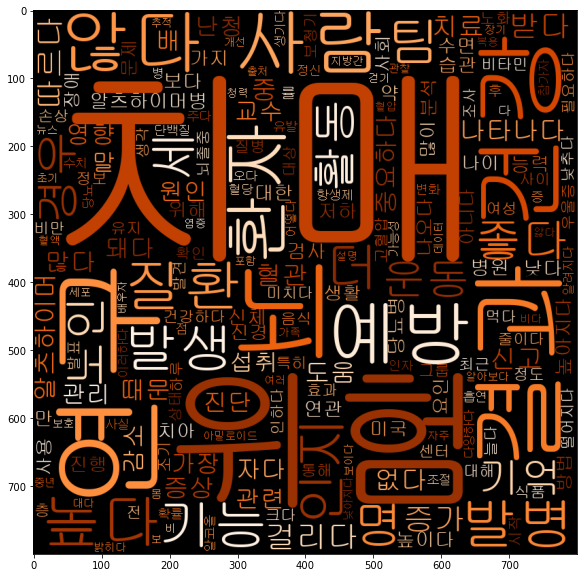

In [27]:
import matplotlib.pyplot as plt
#명사, 동사, 형용사, 부사로 워드클라우드
font_path = '본인 컴퓨터의 폰트 경로'
wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()

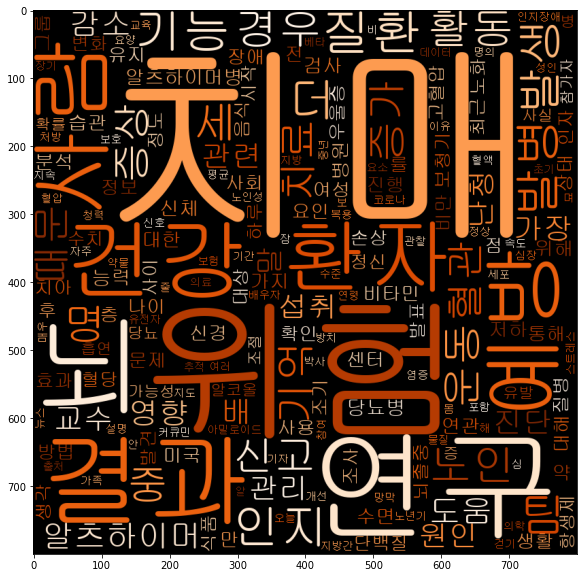

In [28]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()